# Oligodendrocytes

I do not have high confidence in the oligodendrocyte subclustering. The cluster hierarchu across leiden resolutions (as verifiable by clustree) shows variable cluster affiliation and nesting, which generally indicates that the partitioning is artificial. I have chosen to keep a subclustering annotation to attempt to match the other cell types regarding levels of annotation. 

# 1.0 First checks 

In [1]:
import muon as mu
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
adata = mu.read('Oligodendrocytes_clustered.h5mu/rna')

In [3]:
mm_leiden_res02 = pd.read_csv('multimodal/algleiden_res0.2/clusters.txt.gz', sep = '\t')
mm_umap = pd.read_csv('multimodal/md0.5_umap.txt.gz', sep = '\t')

In [4]:
adata.obsm['X_umap'] = np.array(mm_umap[['0', '1']])

In [5]:
adata.obs['mm_leiden_res02'] = list(mm_leiden_res02['clusters'])

adata.obs['mm_leiden_res02'] = adata.obs['mm_leiden_res02'].astype('category')

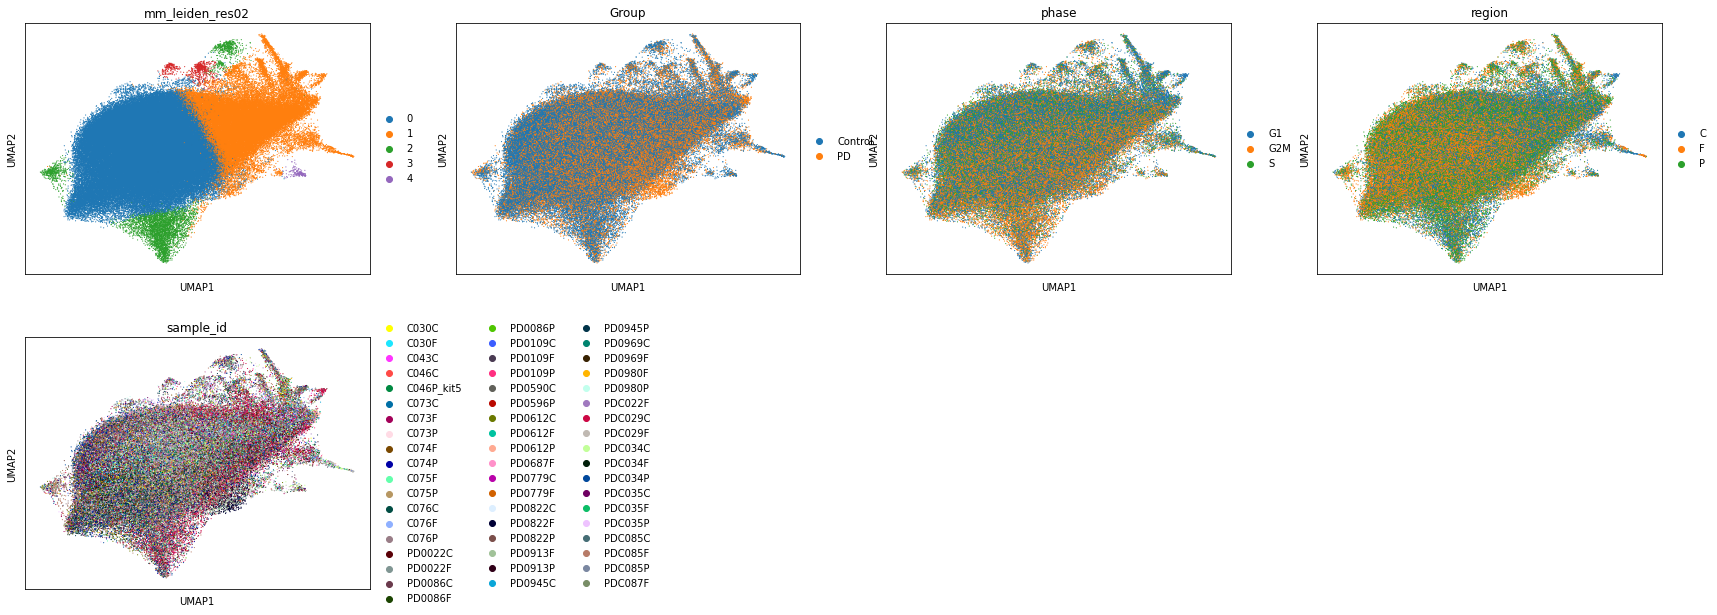

In [6]:
sc.pl.umap(adata, color = ['mm_leiden_res02','Group','phase', 'region','sample_id'], s = 5)

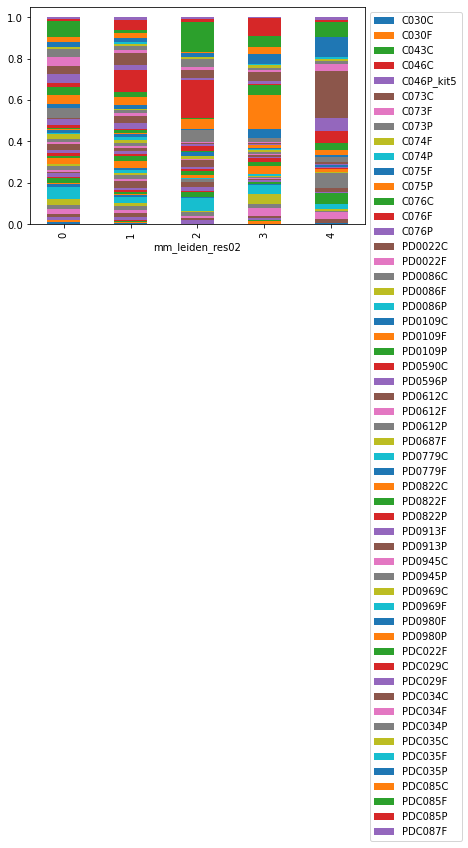

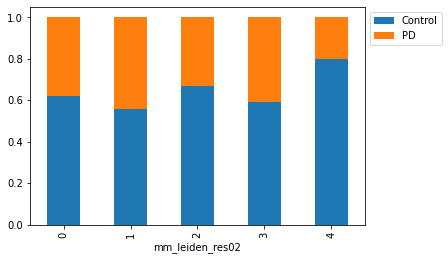

In [7]:
tmp = pd.crosstab(adata.obs['mm_leiden_res02'],adata.obs['sample_id'],normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

tmp = pd.crosstab(adata.obs['mm_leiden_res02'],adata.obs['Group'],normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

# 2.0 Check markers

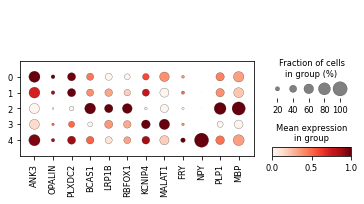

In [8]:
sc.pl.dotplot(adata, ['ANK3','OPALIN', 'PLXDC2', 'BCAS1','LRP1B','RBFOX1','KCNIP4', 'MALAT1',  'FRY', 'NPY','PLP1', 'MBP'], groupby='mm_leiden_res02', standard_scale = 'var')

# 3.0 Cluster characterisation (HVGs) 

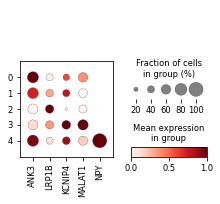

In [9]:
sc.pl.dotplot(adata, ['ANK3','LRP1B','KCNIP4', 'MALAT1','NPY'], groupby='mm_leiden_res02', standard_scale = 'var')

# 4.0 Label transfer and final checks

In [10]:
adata.obs['mm_leiden_res02'] = adata.obs['mm_leiden_res02'].astype(str)

In [11]:
adata.obs['annotation_level_0'] = adata.obs['mm_leiden_res02'].replace({
    '0' : 'Oligodendrocytes',
    '1' : 'Oligodendrocytes',
    '2' : 'Oligodendrocytes',
    '3' : 'Oligodendrocytes',
    '4' : 'Oligodendrocytes',
})

adata.obs['annotation_level_1'] = adata.obs['mm_leiden_res02'].replace({
    '0' : 'Oligodendrocytes',
    '1' : 'Oligodendrocytes',
    '2' : 'Oligodendrocytes',
    '3' : 'Oligodendrocytes',
    '4' : 'Oligodendrocytes',
})

adata.obs['annotation_level_2'] = adata.obs['mm_leiden_res02'].replace({
    '0' : 'OGs-ANK3hi_OPALINhi_PLXDC2hi',
    '1' : 'OGs-ANK3lo_OPALINhi_PLXDC2hi',
    '2' : 'OGs-BCAS1hi_LRP1Bhi',
    '3' : 'OGs-KCNIPhi_MALAT1hi',
    '4' : 'OGs-FRYhi_NPYhi',
})

adata.obs[['annotation_level_0','annotation_level_1','annotation_level_2']].to_csv('../../all_subclustered_annotations/Oligodendrocytes_annotations.csv')

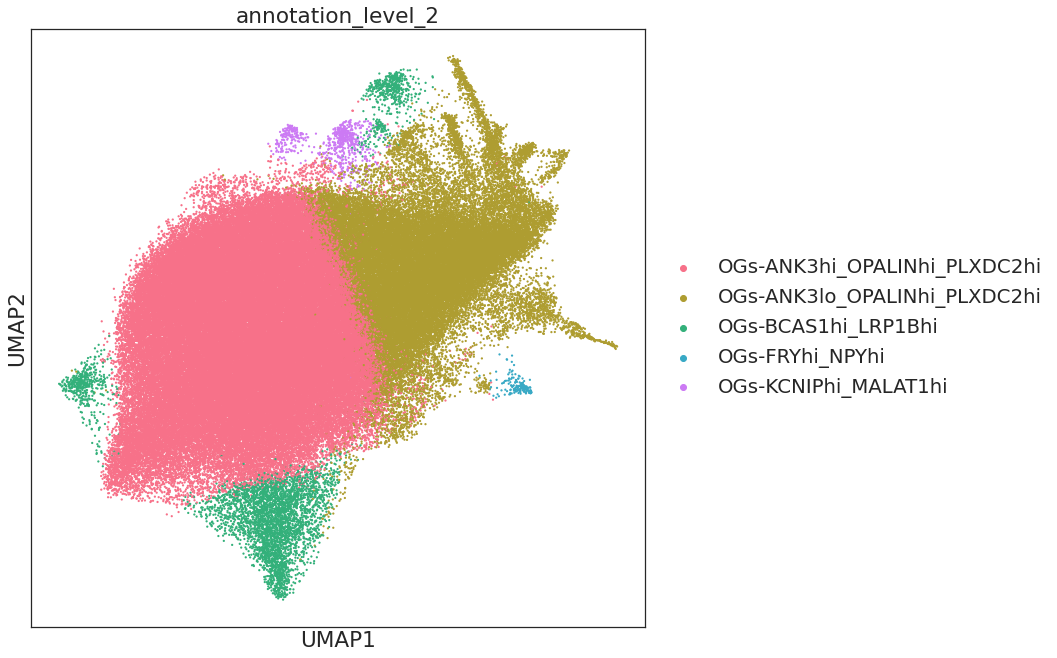

<Figure size 792x792 with 0 Axes>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11,11)}, font_scale=1.8)
sns.set_style('white')

sc.pl.umap(adata, color = 'annotation_level_2', s = 20, palette=sns.color_palette("husl", len(adata.obs['annotation_level_2'].unique())))
plt.savefig('OGs_annotation_level_2_UMAP.png', dpi = 300)
plt.show()